In [1]:
using JSON3
using DataFrames
using CairoMakie
using ColorSchemes
using Unitful
using UnitfulAtomic
using Statistics

In [2]:
resfiles = [
    "Li-BCC_Ecut60_kgrid8.json"
    "Li-BCC_Ecut80_kgrid8.json"
    "Li-BCC_Ecut100_kgrid8.json"
    "Li-BCC_Ecut120_kgrid8.json"
    "Li-BCC_Ecut140_kgrid8.json"
    "Li-BCC_Ecut160_kgrid8.json"
    "Li-BCC_Ecut180_kgrid8.json"
    "Li-BCC_Ecut200_kgrid8.json"
    "Li-XO_Ecut60_kgrid8.json"
    "Li-XO_Ecut80_kgrid8.json"
    "Li-XO_Ecut100_kgrid8.json"
    "Li-XO_Ecut120_kgrid8.json"
    "Li-XO_Ecut140_kgrid8.json"
    "Li-XO_Ecut160_kgrid8.json"
    "Li-XO_Ecut180_kgrid8.json"
    "Li-XO_Ecut200_kgrid8.json"
]
df = DataFrame()
for resfile in resfiles
    data = JSON3.read(resfile)
    name = splitext(basename(data["file"]))[1]
    push!(df, (; name, data...))
end
df

Row,name,file,functionals,pseudopotentials,Ecut,kgrid,temperature,smearing,volume_scaling_range,energies,date,time
,String,String,String,String,Int64,Array…,Float64,String,Array…,Array…,String,String
1,Li-BCC,../Li-BCC.extxyz,"Xc(gga_x_pbe, gga_c_pbe)",cp2k.nc.sr.pbe.v0_1.semicore.gth,60,"[8, 8, 8]",0.00225,DFTK.Smearing.Gaussian(),"[0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06]","[-7.46023, -7.46032, -7.46036, -7.46039, -7.4604, -7.46039, -7.4603]",2025-06-06T09:21:31.077,"51 seconds, 262 milliseconds"
2,Li-BCC,../Li-BCC.extxyz,"Xc(gga_x_pbe, gga_c_pbe)",cp2k.nc.sr.pbe.v0_1.semicore.gth,80,"[8, 8, 8]",0.00225,DFTK.Smearing.Gaussian(),"[0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06]","[-7.47066, -7.47074, -7.47078, -7.4708, -7.47079, -7.47076, -7.47071]",2025-06-06T09:22:40.98,"57 seconds, 795 milliseconds"
3,Li-BCC,../Li-BCC.extxyz,"Xc(gga_x_pbe, gga_c_pbe)",cp2k.nc.sr.pbe.v0_1.semicore.gth,100,"[8, 8, 8]",0.00225,DFTK.Smearing.Gaussian(),"[0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06]","[-7.4723, -7.47237, -7.47242, -7.47244, -7.47243, -7.4724, -7.47235]",2025-06-06T09:24:08.215,"1 minute, 14 seconds, 698 milliseconds"
4,Li-BCC,../Li-BCC.extxyz,"Xc(gga_x_pbe, gga_c_pbe)",cp2k.nc.sr.pbe.v0_1.semicore.gth,120,"[8, 8, 8]",0.00225,DFTK.Smearing.Gaussian(),"[0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06]","[-7.47259, -7.47267, -7.47272, -7.47274, -7.47273, -7.4727, -7.47264]",2025-06-06T09:25:47.187,"1 minute, 25 seconds, 833 milliseconds"
5,Li-BCC,../Li-BCC.extxyz,"Xc(gga_x_pbe, gga_c_pbe)",cp2k.nc.sr.pbe.v0_1.semicore.gth,140,"[8, 8, 8]",0.00225,DFTK.Smearing.Gaussian(),"[0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06]","[-7.47265, -7.47272, -7.47277, -7.47279, -7.47278, -7.47275, -7.4727]",2025-06-06T09:27:29.654,"1 minute, 29 seconds, 432 milliseconds"
6,Li-BCC,../Li-BCC.extxyz,"Xc(gga_x_pbe, gga_c_pbe)",cp2k.nc.sr.pbe.v0_1.semicore.gth,160,"[8, 8, 8]",0.00225,DFTK.Smearing.Gaussian(),"[0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06]","[-7.47265, -7.47273, -7.47278, -7.4728, -7.47279, -7.47276, -7.47271]",2025-06-06T12:12:10.166,"2 minutes, 18 seconds, 531 milliseconds"
7,Li-BCC,../Li-BCC.extxyz,"Xc(gga_x_pbe, gga_c_pbe)",cp2k.nc.sr.pbe.v0_1.semicore.gth,180,"[8, 8, 8]",0.00225,DFTK.Smearing.Gaussian(),"[0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06]","[-7.47266, -7.47273, -7.47278, -7.4728, -7.47279, -7.47276, -7.47271]",2025-06-06T12:14:36.982,"2 minutes, 14 seconds, 80 milliseconds"
8,Li-BCC,../Li-BCC.extxyz,"Xc(gga_x_pbe, gga_c_pbe)",cp2k.nc.sr.pbe.v0_1.semicore.gth,200,"[8, 8, 8]",0.00225,DFTK.Smearing.Gaussian(),"[0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06]","[-7.47266, -7.47273, -7.47278, -7.4728, -7.47279, -7.47276, -7.47271]",2025-06-06T09:30:23.209,"2 minutes, 40 seconds, 887 milliseconds"
9,Li-XO,../Li-XO.extxyz,"Xc(gga_x_pbe, gga_c_pbe)",cp2k.nc.sr.pbe.v0_1.semicore.gth,60,"[8, 8, 8]",0.00225,DFTK.Smearing.Gaussian(),"[0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06]","[-11.7247, -11.7248, -11.725, -11.725, -11.7249, -11.7249, -11.7248]",2025-06-06T10:01:00.139,"1 minute, 24 seconds, 608 milliseconds"


## Convergence

In [3]:
function ε(energies_a, energies_b)
    @assert length(energies_a) == length(energies_b) == 7
    Ea = energies_a .- energies_a[4]
    Eb = energies_b .- energies_b[4]
    sqrt(
        sum(abs2, Ea - Eb) / (
            sqrt(sum(abs2, Ea .- mean(Ea)) * sum(abs2, Eb .- mean(Eb)))
        )
    )
end

ε (generic function with 1 method)

In [4]:
for (name, subdf) in pairs(groupby(df, :name))
    subdf = sort(subdf, :Ecut)
    println(name)
    println(subdf)
    for x in eachrow(subdf[1:end-1,:])
        @info x.Ecut x.energies ε(x.energies, subdf[end,:].energies)
    end
end

GroupKey: (name = "Li-BCC",)
8×12 DataFrame
 Row │ name    file              functionals               pseudopotentials                  Ecut   kgrid      temperature  smearing                  volume_scaling_range               energies                           date                     time                              
     │ String  String            String                    String                            Int64  Array…     Float64      String                    Array…                             Array…                             String                   String                            
─────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Li-BCC  ../Li-BCC.extxyz  Xc(gga_x_pbe, gga_c_pbe)  cp2k.nc.sr.pbe.v0_1.semicore.gth     60  [8, 8, 8]      0

┌ Info: 60
│   x.energies = [-7.460231316582188, -7.4603234269624945, -7.460357446467187, -7.460390927064162, -7.460402107704917, -7.460392739723915, -7.460296838932989]
│   ε(x.energies, (subdf[end, :]).energies) = 0.36200818204690466
└ @ Main /home/schmitz/project_autodiff_for_dft_examples/1_ideas/pseudopotential_tuning/convergence_study_Li_q3/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W4sdnNjb2RlLXJlbW90ZQ==.jl:6
┌ Info: 80
│   x.energies = [-7.470657773422874, -7.470735324997685, -7.470780829414402, -7.470799831579914, -7.470793282709091, -7.470758957484142, -7.4707061910558705]
│   ε(x.energies, (subdf[end, :]).energies) = 0.02044557241653018
└ @ Main /home/schmitz/project_autodiff_for_dft_examples/1_ideas/pseudopotential_tuning/convergence_study_Li_q3/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W4sdnNjb2RlLXJlbW90ZQ==.jl:6


GroupKey: (name = "Li-XO",)
8×12 DataFrame
 Row │ name    file             functionals               pseudopotentials                  Ecut   kgrid      temperature  smearing                  volume_scaling_range               energies                           date                     time                              
     │ String  String           String                    String                            Int64  Array…     Float64      String                    Array…                             Array…                             String                   String                            
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Li-XO   ../Li-XO.extxyz  Xc(gga_x_pbe, gga_c_pbe)  cp2k.nc.sr.pbe.v0_1.semicore.gth     60  [8, 8, 8]      0.0022

┌ Info: 100
│   x.energies = [-7.4722962755242746, -7.472374411836388, -7.472421746586404, -7.4724395880622945, -7.472432070119405, -7.472400650151153, -7.472347903229931]
│   ε(x.energies, (subdf[end, :]).energies) = 0.010056179634173138
└ @ Main /home/schmitz/project_autodiff_for_dft_examples/1_ideas/pseudopotential_tuning/convergence_study_Li_q3/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W4sdnNjb2RlLXJlbW90ZQ==.jl:6
┌ Info: 120
│   x.energies = [-7.472592524086618, -7.472670737097081, -7.472717587546166, -7.472736149725797, -7.472728525769641, -7.472697116883538, -7.4726435908497155]
│   ε(x.energies, (subdf[end, :]).energies) = 0.004978547714325535
└ @ Main /home/schmitz/project_autodiff_for_dft_examples/1_ideas/pseudopotential_tuning/convergence_study_Li_q3/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W4sdnNjb2RlLXJlbW90ZQ==.jl:6
┌ Info: 140
│   x.energies = [-7.472645538222784, -7.472723349234275, -7.472770151227856, -7.472788509233131, -7.472780766548875, -7.47274913

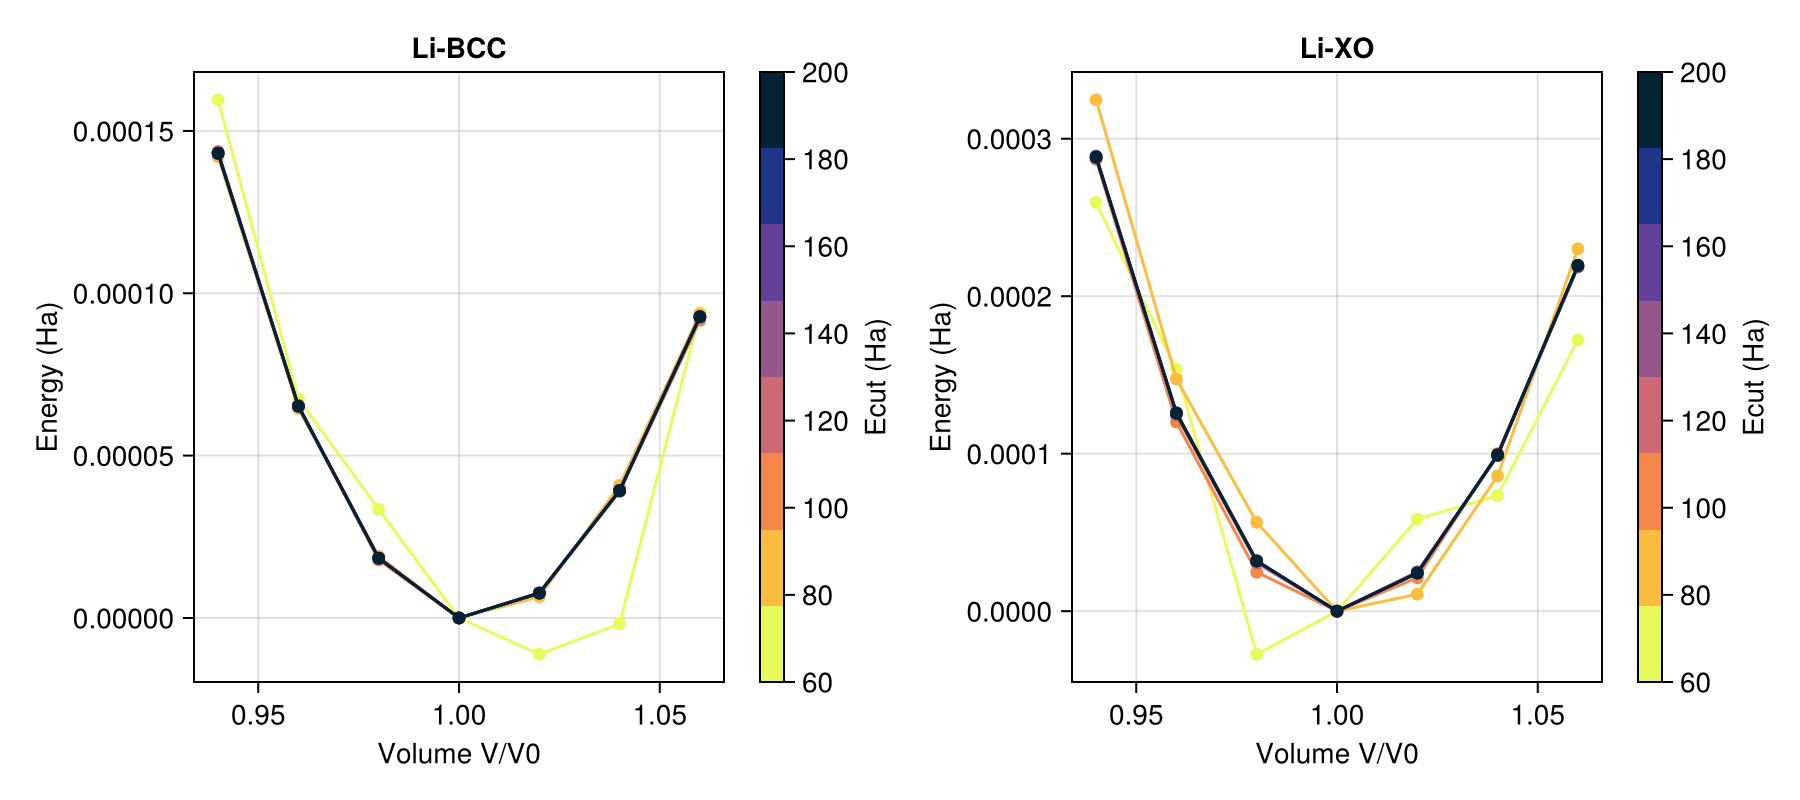

In [5]:
fig = Figure(size=(900,400))
for (i, subdf) in enumerate(groupby(df, :name))
    name = only(unique(subdf.name))
    ax = Makie.Axis(fig[1,2i - 1], title=string(name), xlabel="Volume V/V0", ylabel="Energy (Ha)")

    subdf = sort(subdf, :Ecut)
    Ecuts = subdf.Ecut
    cmap = cgrad(colorschemes[:thermal], length(Ecuts),
				 categorical=true, rev=true)
    for (j, x) in enumerate(eachrow(subdf))
        e = x.energies .- x.energies[4]
        scatterlines!(ax, x.volume_scaling_range, e, color=cmap[j])
    end
    Colorbar(fig[1,2i], label="Ecut (Ha)", colormap=cmap, limits=extrema(Ecuts), ticks=Ecuts)
end
fig

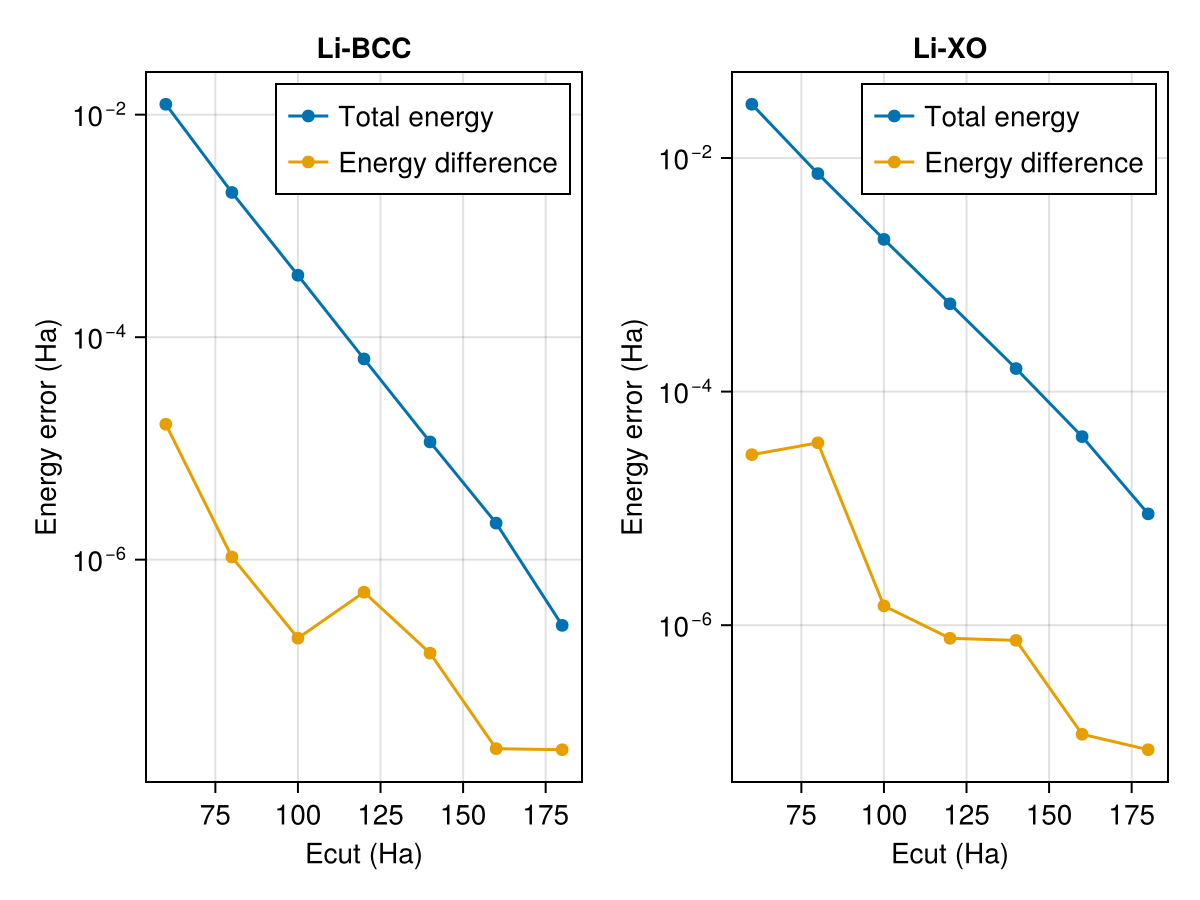

In [6]:
fig = Figure()
for (i, subdf) in enumerate(groupby(df, :name))
    name = only(unique(subdf.name))
    ax = Makie.Axis(fig[1,i], title=string(name), xlabel="Ecut (Ha)", ylabel="Energy error (Ha)", yscale=log10)

    subdf = sort(subdf, :Ecut)

    etot = getindex.(subdf.energies, 4)
    scatterlines!(ax, subdf.Ecut[1:end-1], abs.(etot[1:end-1] .- etot[end]), label="Total energy")

    edif = map(subdf.energies) do e
        e[1] - e[4]
    end
    scatterlines!(ax, subdf.Ecut[1:end-1], abs.(edif[1:end-1] .- edif[end]), label="Energy difference")

    axislegend(ax)
end
fig

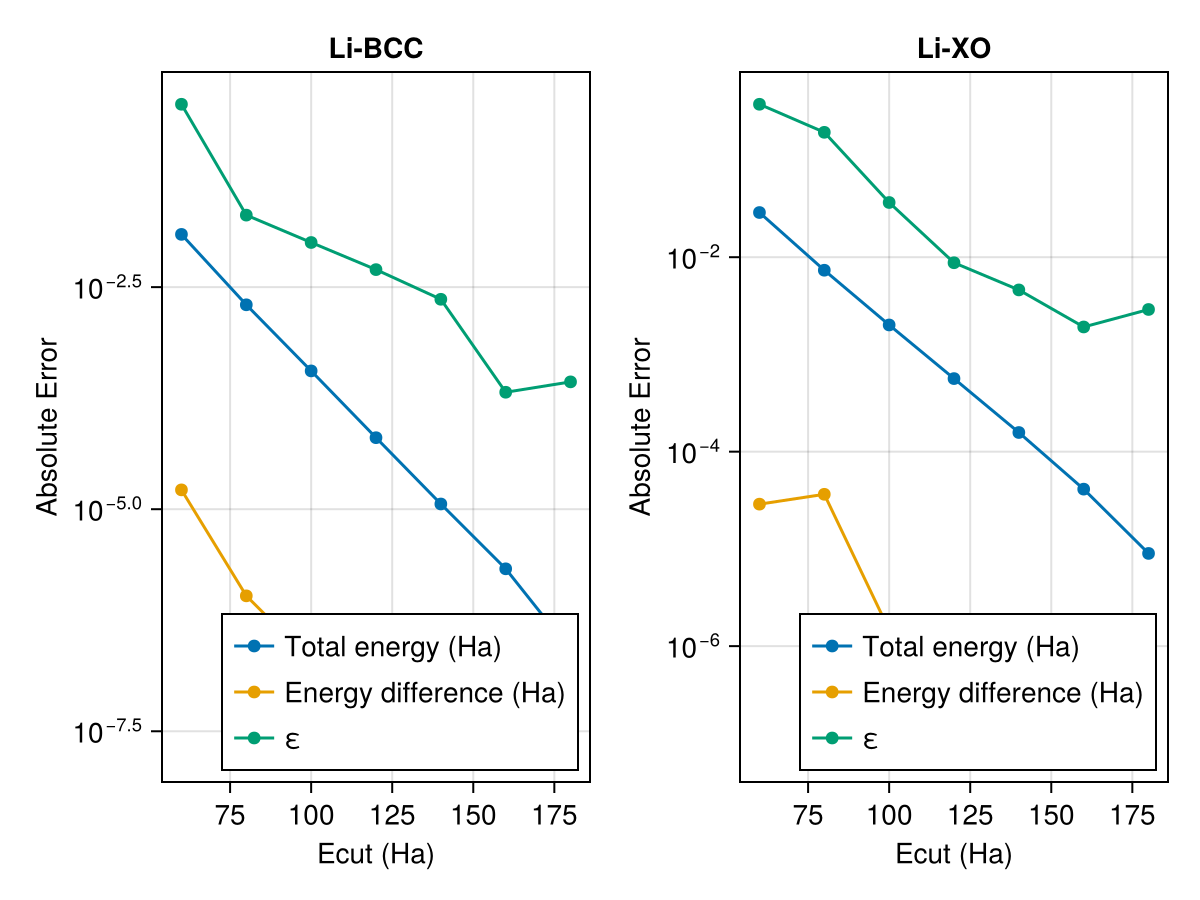

In [7]:
fig = Figure()
for (i, subdf) in enumerate(groupby(df, :name))
    name = only(unique(subdf.name))
    ax = Makie.Axis(fig[1,i], title=string(name), xlabel="Ecut (Ha)", ylabel="Absolute Error", yscale=log10)

    subdf = sort(subdf, :Ecut)

    etot = getindex.(subdf.energies, 4)
    scatterlines!(ax, subdf.Ecut[1:end-1], abs.(etot[1:end-1] .- etot[end]), label="Total energy (Ha)")

    edif = map(subdf.energies) do e
        e[1] - e[4]
    end
    scatterlines!(ax, subdf.Ecut[1:end-1], abs.(edif[1:end-1] .- edif[end]), label="Energy difference (Ha)")

    εs = map(subdf.energies[1:end-1]) do e
        ε(e, subdf.energies[end])
    end
    scatterlines!(ax, subdf.Ecut[1:end-1], εs, label="ε")

    axislegend(ax, position=:rb)
end
fig

## K-points

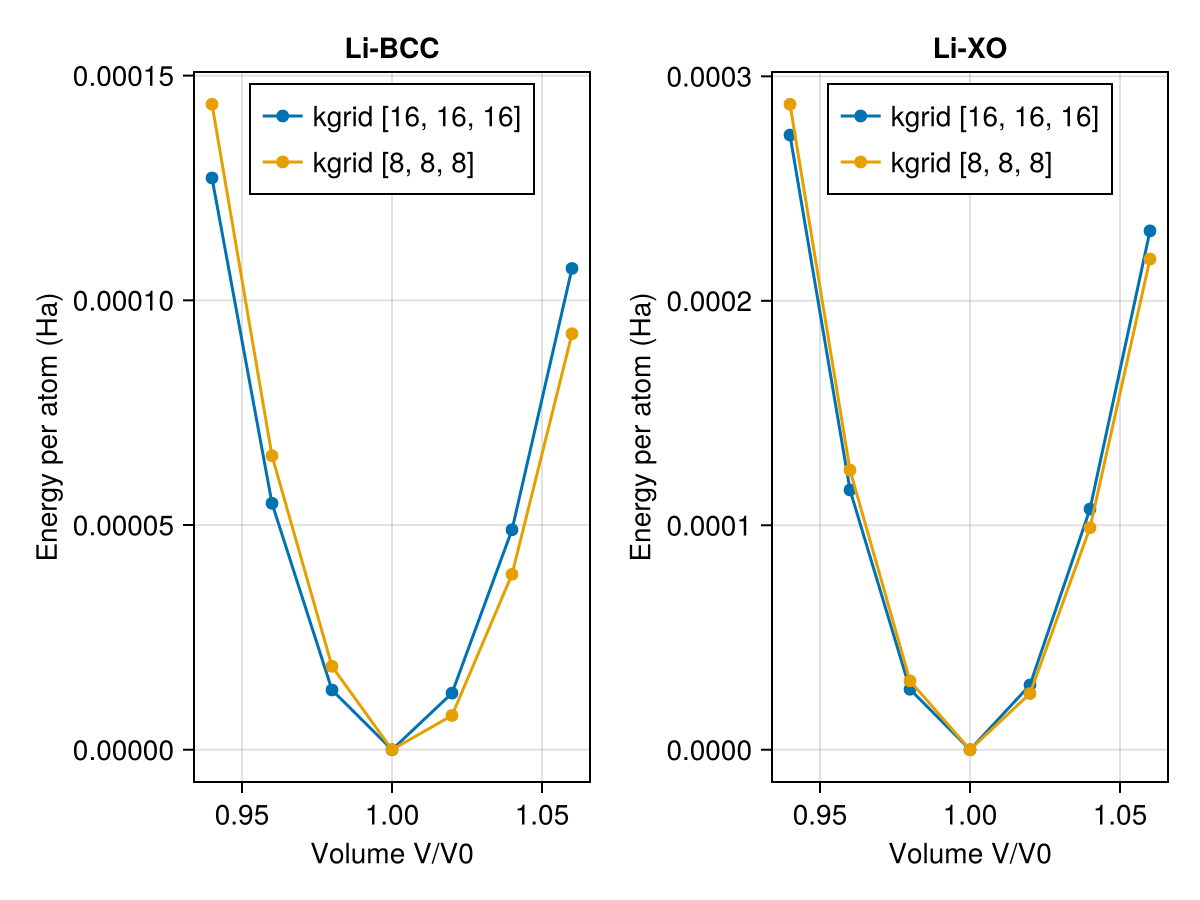

In [28]:
let fig = Figure()
    for (i, name) in enumerate(["Li-BCC", "Li-XO"])
        ax = Makie.Axis(fig[1,i], title=name, xlabel="Volume V/V0", ylabel="Energy per atom (Ha)")

        xref = JSON3.read("$(name)_Ecut120_kgrid16.json")
        x = only(filter(row -> (row.name==name) && (row.Ecut==120), df))

        scatterlines!(ax, x.volume_scaling_range, xref.energies .- xref.energies[4], label="kgrid $(xref.kgrid)")
        scatterlines!(ax, x.volume_scaling_range, x.energies .- x.energies[4], label="kgrid $(x.kgrid)")
        axislegend(ax, position=:ct)
    end
    fig
end

In [29]:
for name in ["Li-BCC", "Li-XO"]
    println(name)
    xref = JSON3.read("$(name)_Ecut120_kgrid16.json")
    x = only(filter(row -> (row.name==name) && (row.Ecut==120), df))

    println("total energies")
    @show x.energies .- xref.energies
    @show (x.energies .- xref.energies) ./ xref.energies

    println("energy differences")
    @show (x.energies[1] - x.energies[4]) - (xref.energies[1] - xref.energies[4])
    @show ((x.energies[1] - x.energies[4]) - (xref.energies[1] - xref.energies[4])) / (xref.energies[1] - xref.energies[4])

    println("epsilon metric")
    @show ε(x.energies, xref.energies)
end

Li-BCC
total energies
x.energies .- xref.energies = [0.0004566938107695151, 0.0004508692152391802, 0.0004455648189285455, 0.00044029280960344863, 0.00043532966811987706, 0.0004303856475509349, 0.00042575448703718877]
(x.energies .- xref.energies) ./ xref.energies = [-6.111211065969805e-5, -6.0332112735639764e-5, -5.962198467292045e-5, -5.891642101441832e-5, -5.825239169660578e-5, -5.7591101905482904e-5, -5.697183678656247e-5]
energy differences
(x.energies[1] - x.energies[4]) - (xref.energies[1] - xref.energies[4]) = 1.6401001166066465e-5
((x.energies[1] - x.energies[4]) - (xref.energies[1] - xref.energies[4])) / (xref.energies[1] - xref.energies[4]) = 0.12891371846058466
epsilon metric
ε(x.energies, xref.energies) = 0.22034337873337226
Li-XO
total energies
x.energies .- xref.energies = [0.00012021340510770528, 0.00011535243499771752, 0.00011021863149096589, 0.00010650619707419651, 0.00010269716612043567, 9.818041297826596e-5, 9.396217262924722e-5]
(x.energies .- xref.energies) ./ xref

This shows that using a small k-mesh of (8,8,8) is not fully converged for both cases. However, using consistent settings of (8,8,8) for both Li-q3 and Li-q1 during training the idea is to approximately cancel out this effect for faster training iteration.

## Comparison to all-electron data

In [31]:
wien2k_bcc = JSON3.read("../all_electron_data/wien2k_Li-BCC.json")

JSON3.Object{Vector{UInt8}, Vector{UInt64}} with 2 entries:
  :volumes_Ang3 => [19.05, 19.4553, 19.8606, 20.2659, 20.6712, 21.0766, 21.4819]
  :energies_eV  => [-204.685, -204.687, -204.688, -204.688, -204.688, -204.687,…

In [32]:
wien2k_xo = JSON3.read("../all_electron_data/wien2k_Li-XO.json")

JSON3.Object{Vector{UInt8}, Vector{UInt64}} with 2 entries:
  :volumes_Ang3 => [15.8184, 16.1549, 16.4915, 16.8281, 17.1646, 17.5012, 17.83…
  :energies_eV  => [-2252.44, -2252.45, -2252.45, -2252.45, -2252.45, -2252.45,…

In [33]:
e_ref = Dict(
    "Li-BCC"=>ustrip.(uconvert.(u"meV", wien2k_bcc[:energies_eV] * u"eV")) / 1,
    "Li-XO" =>ustrip.(uconvert.(u"meV", wien2k_xo[:energies_eV] * u"eV")) / 2,
)

Dict{String, Vector{Float64}} with 2 entries:
  "Li-XO"  => [-1.12622e6, -1.12622e6, -1.12622e6, -1.12623e6, -1.12623e6, -1.1…
  "Li-BCC" => [-204685.0, -2.04687e5, -2.04688e5, -2.04688e5, -2.04688e5, -2.04…

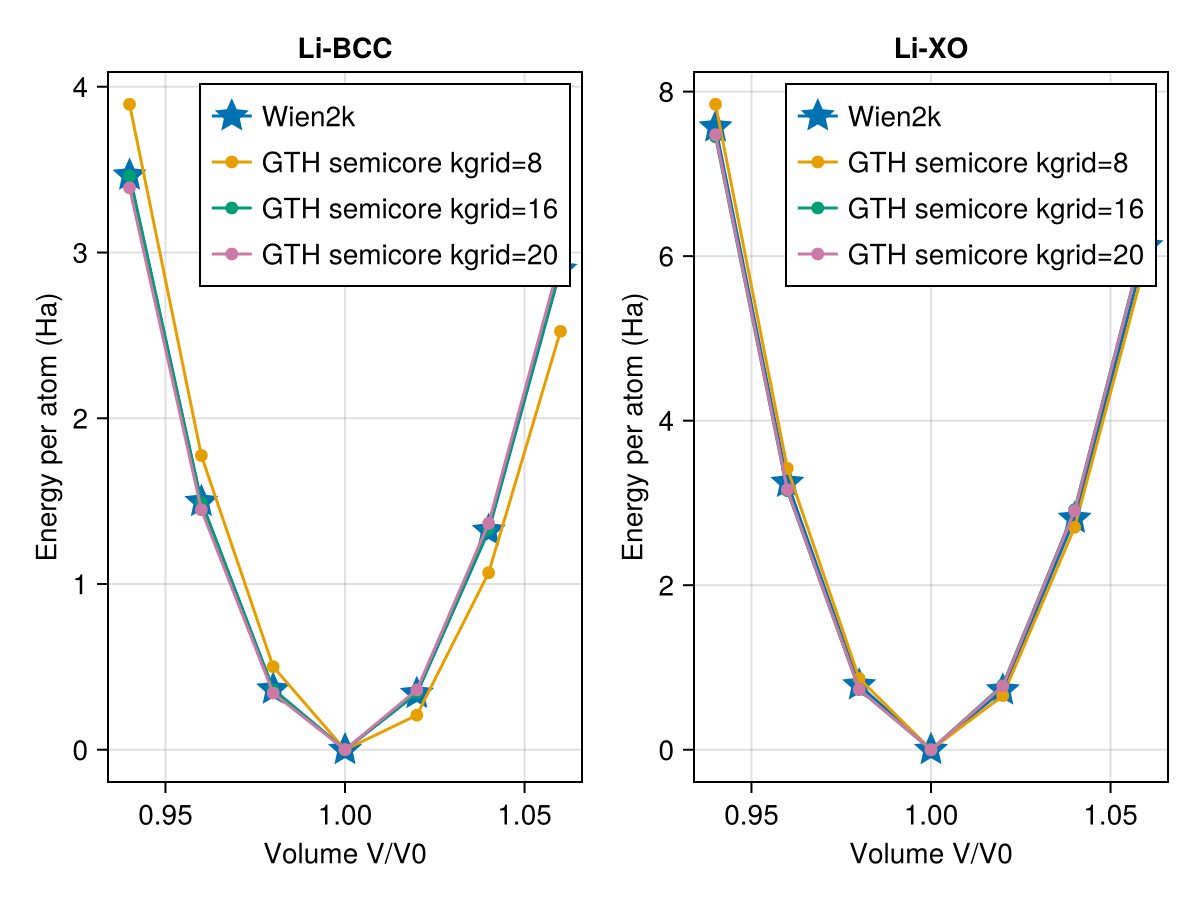

In [43]:
fig = Figure()
for (i, subdf) in enumerate(groupby(df, :name))
    name = only(unique(subdf.name))
    ax = Makie.Axis(fig[1,i], title=string(name), xlabel="Volume V/V0", ylabel="Energy per atom (Ha)")

    subdf = sort(subdf, :Ecut)
    x = subdf[end,:]
    e = x.energies
    e = e .- e[4]
    e = ustrip.(uconvert.(u"meV", e * u"hartree"))

    e_allelectron = e_ref[name]
    e_allelectron = e_allelectron .- e_allelectron[4]

    scatterlines!(ax, x.volume_scaling_range, e_allelectron, label="Wien2k", marker=:star5, markersize=20)
    scatterlines!(ax, x.volume_scaling_range, e, label="GTH semicore kgrid=8")

    for kgrid in [16, 20]
        e = JSON3.read("$(name)_Ecut120_kgrid$(kgrid).json")[:energies]
        e = e .- e[4]
        e = ustrip.(uconvert.(u"meV", e * u"hartree"))
        scatterlines!(ax, x.volume_scaling_range, e, label="GTH semicore kgrid=$kgrid")
    end

    axislegend(ax)
end
fig